In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# set default figure size
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
pd.options.display.max_columns = None

In [4]:
# Import data
df = pd.read_csv('data/Kickstarter_preprocessed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 76 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         209222 non-null  int64  
 1   backers_count                      209222 non-null  int64  
 2   blurb                              209214 non-null  object 
 3   converted_pledged_amount           209222 non-null  int64  
 4   country                            209222 non-null  object 
 5   created_at                         209222 non-null  int64  
 6   currency                           209222 non-null  object 
 7   currency_symbol                    209222 non-null  object 
 8   currency_trailing_code             209222 non-null  bool   
 9   current_currency                   209222 non-null  object 
 10  deadline                           209222 non-null  int64  
 11  disable_communication              2092

In [6]:
# delete first column
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [7]:
# rename some columns
df.rename(columns={'name_category':'category_sub','slug_category':'category'},inplace=True)

In [8]:
# split text in column category, keep only left part of string
df.category = df.category.apply(lambda x: x.split('/')[0])

In [9]:
# change to lower case string
df.category_sub = df.category_sub.str.lower()

In [10]:
# convert description (blurp) into integer --> number of words
df.blurb = df['blurb'].apply(lambda x: len(str(x).split()));

## Change unixtime into human readible time

In [11]:
# create function for format change
# we could also use lambda x: datetime.utcfromtimestamp(x)

def chg_date(x):
    return datetime.utcfromtimestamp(x)

In [12]:
# apply on dataframe

time_col = ['created_at','deadline','launched_at']
df[time_col] = df[time_col].applymap(chg_date)

In [13]:
# create new feature called duration
df['duration'] = df.deadline - df.launched_at

In [14]:
# calculate usd_goal
df['usd_goal'] = df.goal * df.static_usd_rate

In [15]:
df['launched_month'] = df['launched_at'].dt.month

## Show target, count classes

Let's take a look on our target.

In [16]:
df.state.value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

We have found four different categories:
- successful
- failed
- live
- suspended

We are restricting the analysis on projects which have been finished, therefore we delete all rows of the categories **canceled**, **live** and **suspended**.

In [17]:
df = df[df.state.isin(['successful','failed'])]

In [18]:
df.state.value_counts()

successful    117465
failed         75199
Name: state, dtype: int64

## Target & Features

In [22]:
# define target
target = ['state']

In [23]:
# define features
features = ['blurb','category','category_sub',\
            'duration','currency','usd_goal','country',\
            'type','staff_pick','launched_month']

In [24]:
df[features].head()

,blurb,category,category_sub,duration,currency,usd_goal,country,type,staff_pick,launched_month
0,20,games,live games,60 days,USD,5000.0,US,Town,False,4
1,15,film & video,drama,30 days,USD,6000.0,US,Town,False,8
2,19,film & video,experimental,30 days,USD,10000.0,US,Town,False,7
3,25,journalism,journalism,30 days,USD,8000.0,US,Town,False,5
4,11,games,mobile games,30 days,USD,2000.0,US,Town,False,9


In [25]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   blurb           192664 non-null  int64          
 1   category        192664 non-null  object         
 2   category_sub    192664 non-null  object         
 3   duration        192664 non-null  timedelta64[ns]
 4   currency        192664 non-null  object         
 5   usd_goal        192664 non-null  float64        
 6   country         192664 non-null  object         
 7   type            192565 non-null  object         
 8   staff_pick      192664 non-null  bool           
 9   launched_month  192664 non-null  int64          
dtypes: bool(1), float64(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 14.9+ MB


In [26]:
# convert all features into categories
df = df.astype({name:'category' for name in features})

In [27]:
# convert blurb into int, usd_goal into float
df.usd_goal = df.usd_goal.astype(float)
df.blurb = df.blurb.astype(int)

In [28]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   blurb           192664 non-null  int64   
 1   category        192664 non-null  category
 2   category_sub    192664 non-null  category
 3   duration        192664 non-null  category
 4   currency        192664 non-null  category
 5   usd_goal        192664 non-null  float64 
 6   country         192664 non-null  category
 7   type            192565 non-null  category
 8   staff_pick      192664 non-null  category
 9   launched_month  192664 non-null  category
dtypes: category(8), float64(1), int64(1)
memory usage: 8.0 MB


In [29]:
# convert categorical features into integer classes
# cat = ['category','category_sub','duration','currency','country','localized_name','type','staff_pick']
# df[cat] = df[cat].apply(lambda x: x.cat.codes);

In [30]:
# df[features].info()

In [31]:
# calculate the correlation matrix 
feat = df[features]
corr = feat.corr()

In [32]:
feat.head()

,blurb,category,category_sub,duration,currency,usd_goal,country,type,staff_pick,launched_month
0,20,games,live games,60 days,USD,5000.0,US,Town,False,4
1,15,film & video,drama,30 days,USD,6000.0,US,Town,False,8
2,19,film & video,experimental,30 days,USD,10000.0,US,Town,False,7
3,25,journalism,journalism,30 days,USD,8000.0,US,Town,False,5
4,11,games,mobile games,30 days,USD,2000.0,US,Town,False,9


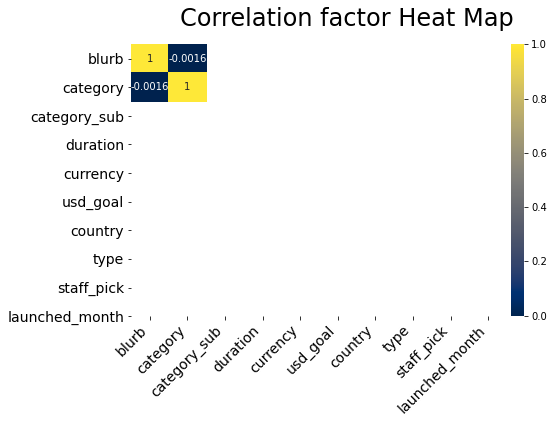

In [33]:
# plot heatmap

fig, ax = plt.subplots()
sns.heatmap(corr, xticklabels=feat.columns, yticklabels=feat.columns, annot=True,cmap='cividis')

fig.text(s="Correlation factor Heat Map",x=.5,y=0.95, fontsize = 24,ha='center', va='center')
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(rotation=0, fontsize=14);

Due to the high correlation between country and currency, we decided not to use currency as a feature

In [34]:
features.pop(features.index('currency'));

## Train test split

In [35]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [36]:
X = df[features]
y = df[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape , y_test.shape)

Train set: (144498, 9) (144498, 1)
Test set:  (48166, 9) (48166, 1)


## Set up Random forrest classifier

Import necesarry modules 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Create Random forrest object and fit with train values. `values.ravel()` transforms the y_train into 1D array

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train.values.ravel());

Predict the target values for the test data

In [49]:
y_pred = rfc.predict(X_test)

Print the classifictaion report and the confusin matrix

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.78      0.71      0.74     18879
  successful       0.82      0.87      0.84     29287

    accuracy                           0.81     48166
   macro avg       0.80      0.79      0.79     48166
weighted avg       0.80      0.81      0.80     48166



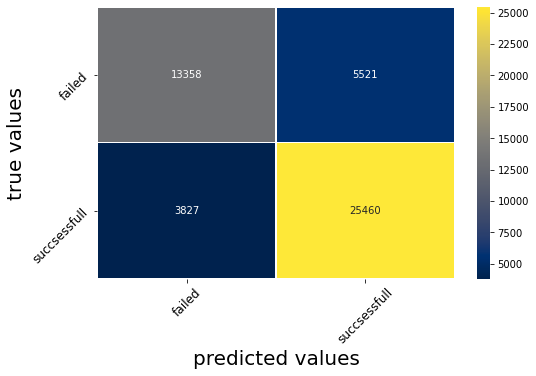

In [51]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

### Take a look on feature importance

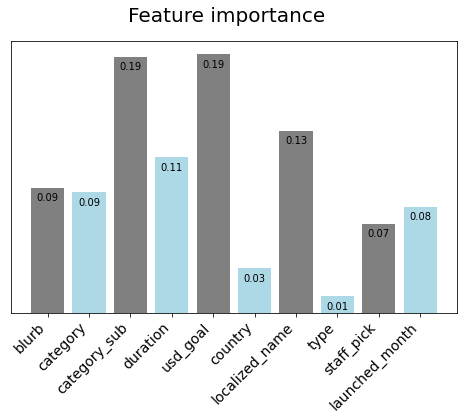

In [52]:
# calculate importance
importance = rfc.feature_importances_

# set axis, create figure
x_axis = list(range(len(importance)))
fig, ax = plt.subplots()

# plot figure
plt.bar(x_axis, importance, color=['grey','lightblue'])

# add Title
fig.text(s="Feature importance",x=.5,y=0.95, fontsize = 20,ha='center', va='center')

# edit xticks
plt.xticks(x_axis, features, rotation=45, fontsize=14, ha='right')
#plt.yticks(rotation=0, fontsize=14);
plt.yticks([])
# add value inside the bars
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

## Random Forest with one hot encoding

In [44]:
rfc = RandomForestClassifier(max_depth=20, max_features=0.5, min_samples_split=5, n_jobs=-1)
rfc.fit(X_train_enc, y_train.values.ravel());

Predict the target values for the test data

In [45]:
y_pred = rfc.predict(X_test_enc)

Print the classifictaion report and the confusin matrix

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.75      0.36      0.48     18879
  successful       0.69      0.92      0.79     29287

    accuracy                           0.70     48166
   macro avg       0.72      0.64      0.64     48166
weighted avg       0.71      0.70      0.67     48166



In [48]:
y_pred_train = rfc.predict(X_train_enc)

Print the classifictaion report and the confusin matrix

In [49]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      failed       0.79      0.38      0.51     56320
  successful       0.70      0.94      0.80     88178

    accuracy                           0.72    144498
   macro avg       0.75      0.66      0.66    144498
weighted avg       0.74      0.72      0.69    144498



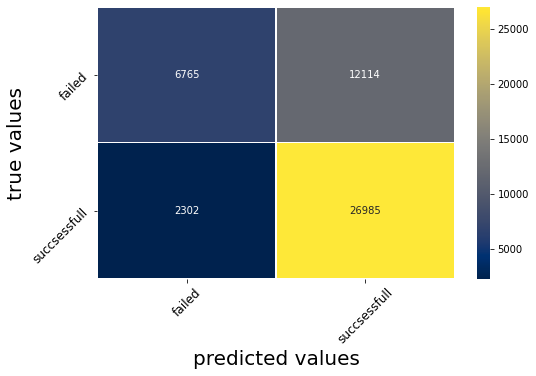

In [47]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

## Setup XGBoost Classifier

In [50]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [51]:
enc = OneHotEncoder(drop='first').fit(pd.concat([X_train, X_test], axis=0))

In [52]:
X_train_enc = enc.transform(X_train)

In [53]:
X_test_enc = enc.transform(X_test)

In [124]:
xgb_model = XGBClassifier()

In [125]:
xgb_model.fit(X_train_enc, y_train.values.ravel())

/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
y_pred = xgb_model.predict(X_test_enc)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.71      0.77      0.74     18879
  successful       0.84      0.79      0.82     29287

    accuracy                           0.78     48166
   macro avg       0.77      0.78      0.78     48166
weighted avg       0.79      0.78      0.78     48166



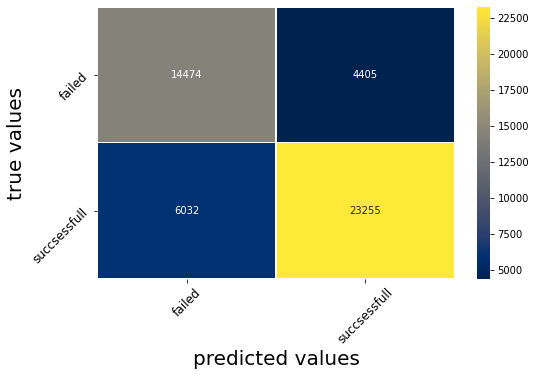

In [128]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
parameters = {
    'learning_rate':[0.01, 1., 10],
    'max_depth': [1, 5, 10],
    'booster': ['gbtree', 'gblinear']
}

In [131]:
xgb_model = XGBClassifier()
xgb_clf = GridSearchCV(xgb_model, parameters, verbose=3, cv=3)
xgb_clf.fit(X_train_enc, y_train.values.ravel())

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:20:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END booster=gbtree, learning_rate=0.01, max_depth=1;, score=0.610 total time=   4.4s
[14:20:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gbtree, learning_rate=0.01, max_depth=1;, score=0.610 total time=   4.3s
[14:20:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gbtree, learning_rate=0.01, max_depth=1;, score=0.610 total time=   5.6s
[14:20:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gbtree, learning_rate=0.01, max_depth=5;, score=0.687 total time=   9.5s
[14:20:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gbtree, learning_rate=0.01, max_depth=5;, score=0.698 total time=   9.9s
[14:21:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gbtree, learning_rate=0.01, max_depth=5;, score=0.700 total time=   9.3s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END booster=gbtree, learning_rate=0.01, max_depth=10;, score=0.709 total time=  17.2s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END booster=gbtree, learning_rate=0.01, max_depth=10;, score=0.708 total time=  15.1s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END booster=gbtree, learning_rate=0.01, max_depth=10;, score=0.711 total time=  15.5s
[14:21:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gbtree, learning_rate=1.0, max_depth=1;, score=0.768 total time=   4.8s
[14:22:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gbtree, learning_rate=1.0, max_depth=1;, score=0.763 total time=   4.7s
[14:22:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gbtree, learning_rate=1.0, max_depth=1;, score=0.772 total time=   5.4s
[14:22:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gbtree, learning_rate=1.0, max_depth=5;, score=0.784 total time=   9.7s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END booster=gbtree, learning_rate=1.0, max_depth=5;, score=0.784 total time=  10.0s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END booster=gbtree, learning_rate=1.0, max_depth=5;, score=0.785 total time=   9.8s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END booster=gbtree, learning_rate=1.0, max_depth=10;, score=0.779 total time=  15.8s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:22:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END booster=gbtree, learning_rate=1.0, max_depth=10;, score=0.777 total time=  14.4s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END booster=gbtree, learning_rate=1.0, max_depth=10;, score=0.779 total time=  15.1s
[14:23:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gbtree, learning_rate=10, max_depth=1;, score=0.390 total time=   5.3s
[14:23:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gbtree, learning_rate=10, max_depth=1;, score=0.390 total time=   4.9s
[14:23:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gbtree, learning_rate=10, max_depth=1;, score=0.390 total time=   5.0s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END booster=gbtree, learning_rate=10, max_depth=5;, score=0.626 total time=   5.1s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END booster=gbtree, learning_rate=10, max_depth=5;, score=0.610 total time=   5.1s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END booster=gbtree, learning_rate=10, max_depth=5;, score=0.610 total time=   5.3s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END booster=gbtree, learning_rate=10, max_depth=10;, score=0.628 total time=   5.6s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END booster=gbtree, learning_rate=10, max_depth=10;, score=0.655 total time=   5.2s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END booster=gbtree, learning_rate=10, max_depth=10;, score=0.557 total time=   5.3s
[14:24:15] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=0.01, max_depth=1;, score=0.778 total time=   1.6s
[14:24:17] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=0.01, max_depth=1;, score=0.774 total time=   1.7s
[14:24:18] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=0.01, max_depth=1;, score=0.778 total time=   1.6s
[14:24:20] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=0.01, max_depth=5;, score=0.778 total time=   1.7s
[14:24:21] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=0.01, max_depth=5;, score=0.774 total time=   1.6s
[14:24:23] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=0.01, max_depth=5;, score=0.778 total time=   1.7s
[14:24:25] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=0.01, max_depth=10;, score=0.778 total time=   1.9s
[14:24:27] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=0.01, max_depth=10;, score=0.774 total time=   1.8s
[14:24:28] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=0.01, max_depth=10;, score=0.778 total time=   1.8s
[14:24:30] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=1.0, max_depth=1;, score=0.774 total time=   1.6s
[14:24:32] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=1.0, max_depth=1;, score=0.763 total time=   1.6s
[14:24:33] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=1.0, max_depth=1;, score=0.757 total time=   1.6s
[14:24:35] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=1.0, max_depth=5;, score=0.772 total time=   1.6s
[14:24:37] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=1.0, max_depth=5;, score=0.763 total time=   1.6s
[14:24:38] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=1.0, max_depth=5;, score=0.757 total time=   1.9s
[14:24:40] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=1.0, max_depth=10;, score=0.772 total time=   1.6s
[14:24:42] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=1.0, max_depth=10;, score=0.763 total time=   1.6s
[14:24:43] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=1.0, max_depth=10;, score=0.757 total time=   1.5s
[14:24:45] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=10, max_depth=1;, score=0.390 total time=   1.4s
[14:24:46] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=10, max_depth=1;, score=0.610 total time=   1.3s
[14:24:48] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=10, max_depth=1;, score=0.390 total time=   1.3s
[14:24:49] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=10, max_depth=5;, score=0.610 total time=   1.3s
[14:24:50] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=10, max_depth=5;, score=0.610 total time=   1.3s
[14:24:52] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=10, max_depth=5;, score=0.610 total time=   1.2s
[14:24:53] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END booster=gblinear, learning_rate=10, max_depth=10;, score=0.610 total time=   1.2s
[14:24:54] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END booster=gblinear, learning_rate=10, max_depth=10;, score=0.390 total time=   1.2s
[14:24:55] WARNING: ../src/learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:24:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END booster=gblinear, learning_rate=10, max_depth=10;, score=0.610 total time=   1.3s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [132]:
xgb_clf.best_params_

{'booster': 'gbtree', 'learning_rate': 1.0, 'max_depth': 5}

In [133]:
best_xgb = xgb_clf.best_estimator_

In [54]:
best_xgb = XGBClassifier(booster='gbtree', learning_rate=1.0, max_depth=5)

In [55]:
best_xgb.fit(X_train_enc, y_train)

/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:33:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = best_xgb.predict(X_test_enc)

In [58]:
y_pred_train = best_xgb.predict(X_train_enc)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.72      0.75      0.73     18879
  successful       0.83      0.81      0.82     29287

    accuracy                           0.79     48166
   macro avg       0.77      0.78      0.78     48166
weighted avg       0.79      0.79      0.79     48166



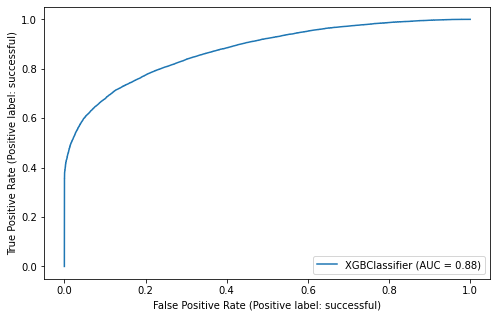

In [65]:
plot_roc_curve(best_xgb, X_test_enc, y_test)

In [59]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      failed       0.74      0.77      0.75     56320
  successful       0.85      0.83      0.84     88178

    accuracy                           0.80    144498
   macro avg       0.79      0.80      0.79    144498
weighted avg       0.80      0.80      0.80    144498



In [60]:
from sklearn.metrics import plot_roc_curve

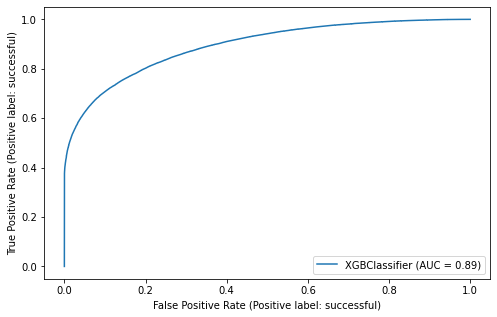

In [66]:
plot_roc_curve(best_xgb, X_train_enc, y_train)

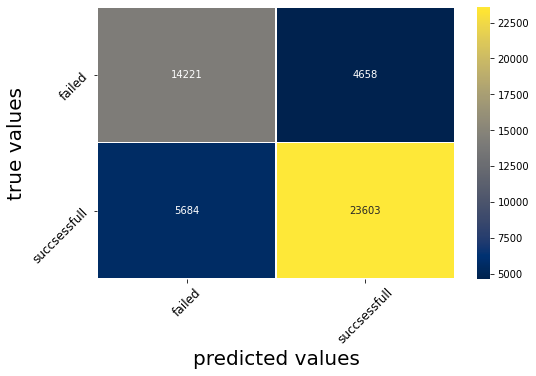

In [136]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

In [140]:
xgb_model = XGBClassifier(booster='dart', max_depth= 5, learning_rate=1)

In [141]:
xgb_model.fit(X_train_enc, y_train.values.ravel(),)

/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
y_pred = xgb_model.predict(X_test_enc)

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.71      0.75      0.73     18879
  successful       0.84      0.81      0.82     29287

    accuracy                           0.79     48166
   macro avg       0.77      0.78      0.78     48166
weighted avg       0.79      0.79      0.79     48166



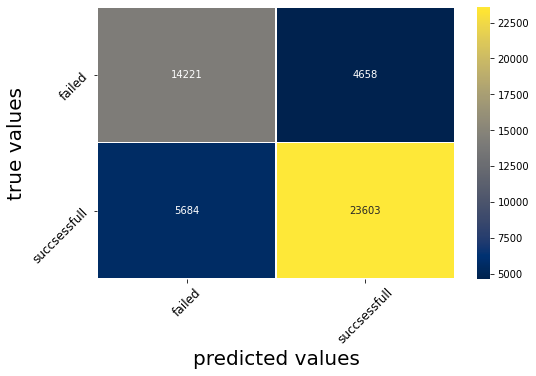

In [144]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

## Experimenting with the gamma settings

In [145]:
parameters = {
    'gamma': [0.1, 1, 10]
}

In [146]:
xgb_model = XGBClassifier(
    booster='gbtree',
    learning_rate=1,
    max_depth=5
)
xgb_clf = GridSearchCV(xgb_model, parameters, verbose=3, cv=3)
xgb_clf.fit(X_train_enc, y_train.values.ravel())

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END .........................gamma=0.1;, score=0.784 total time=   7.7s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END .........................gamma=0.1;, score=0.782 total time=   7.9s
[14:58:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END .........................gamma=0.1;, score=0.786 total time=   7.2s
[14:58:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END ...........................gamma=1;, score=0.784 total time=   8.0s
[14:58:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END ...........................gamma=1;, score=0.783 total time=   7.5s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END ...........................gamma=1;, score=0.785 total time=   8.1s
[14:58:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END ..........................gamma=10;, score=0.786 total time=   7.3s
[14:58:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END ..........................gamma=10;, score=0.785 total time=   7.7s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END ..........................gamma=10;, score=0.786 total time=  12.3s


/home/mario/neuefische/ML_Classification_Kickstarter/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=1, max_delta_step=None,
                                     max_depth=5, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [147]:
xgb_clf.best_params_

{'gamma': 10}

In [148]:
best_xgb = xgb_clf.best_estimator_

In [149]:
y_pred = best_xgb.predict(X_test_enc)

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.71      0.76      0.73     18879
  successful       0.84      0.80      0.82     29287

    accuracy                           0.78     48166
   macro avg       0.77      0.78      0.78     48166
weighted avg       0.79      0.78      0.79     48166



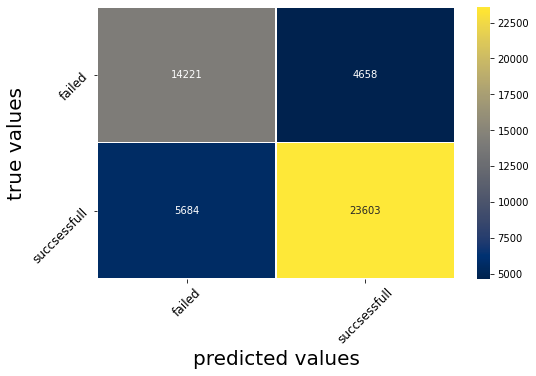

In [136]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);

## Setup KNN classifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn = KNeighborsClassifier()
knn.fit(X_train_enc,y_train.values.ravel());

In [153]:
y_pred = knn.predict(X_test_enc)

Print the classifictaion report and the confusin matrix

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      failed       0.66      0.66      0.66     18879
  successful       0.78      0.78      0.78     29287

    accuracy                           0.74     48166
   macro avg       0.72      0.72      0.72     48166
weighted avg       0.74      0.74      0.74     48166



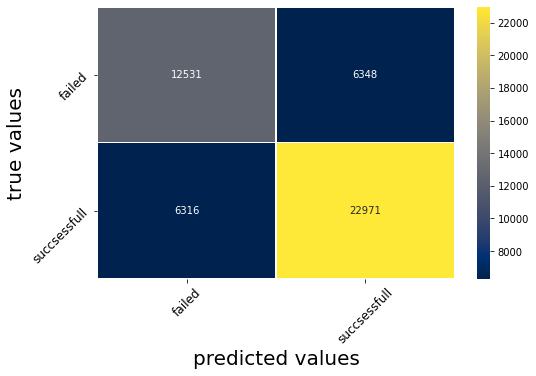

In [155]:
# create confusion matrix
cm = confusion_matrix(y_test,y_pred)

# define figure size
fig, ax = plt.subplots()

# plot heatmap
sns.heatmap(cm, cmap='cividis',ax=ax, annot=True, fmt='d', linewidths=.5)

# adjust figure
ax.set_xticklabels(['failed','succsessfull'])
ax.set_yticklabels(['failed','succsessfull'])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('true values',fontsize=20);